In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np

# Code

In [112]:
def angles_timeseries(path: str):
    _5DJ8trajs = sorted(glob.glob(path))
    
    dfs = {}
    for i in range(len(_5DJ8trajs)):
        dfs[i+1] = pd.read_table(_5DJ8trajs[i])
    
    rolling_avg_window_size = 50
    fig,ax =  plt.subplots(nrows=2, ncols=3, figsize=(20,10), sharex=True, sharey=True)
    fig.suptitle("OCD angle (AB) timeseries")
    for i in range(0,2):
        for j in range(0,3):
            if i == 0:
                ax[i][j].set_title(f"lambda window 0.{j*2}")
                ax[i][j].plot(dfs[j+1]["Time"], dfs[j+1]["AB"])
                ax[i][j].plot(dfs[j+1]["Time"], dfs[j+1]["AB"].rolling(rolling_avg_window_size).mean(), color="red")
            else:
                ax[i][j].set_title(f"lambda window 0.{(j+3)*2}")
                ax[i][j].plot(dfs[3+j+1]["Time"], dfs[3+j+1]["AB"])
                ax[i][j].plot(dfs[3+j+1]["Time"], dfs[3+j+1]["AB"].rolling(rolling_avg_window_size).mean(), color="red")
            
            if i == 1 and j == 1:
                ax[i][j].set_xlabel("Frames")
            if i == 0 and j == 0 or i == 1 and j == 0:
                ax[i][j].set_ylabel("Interface angle / °")
    None

# Problematic run1 rc step

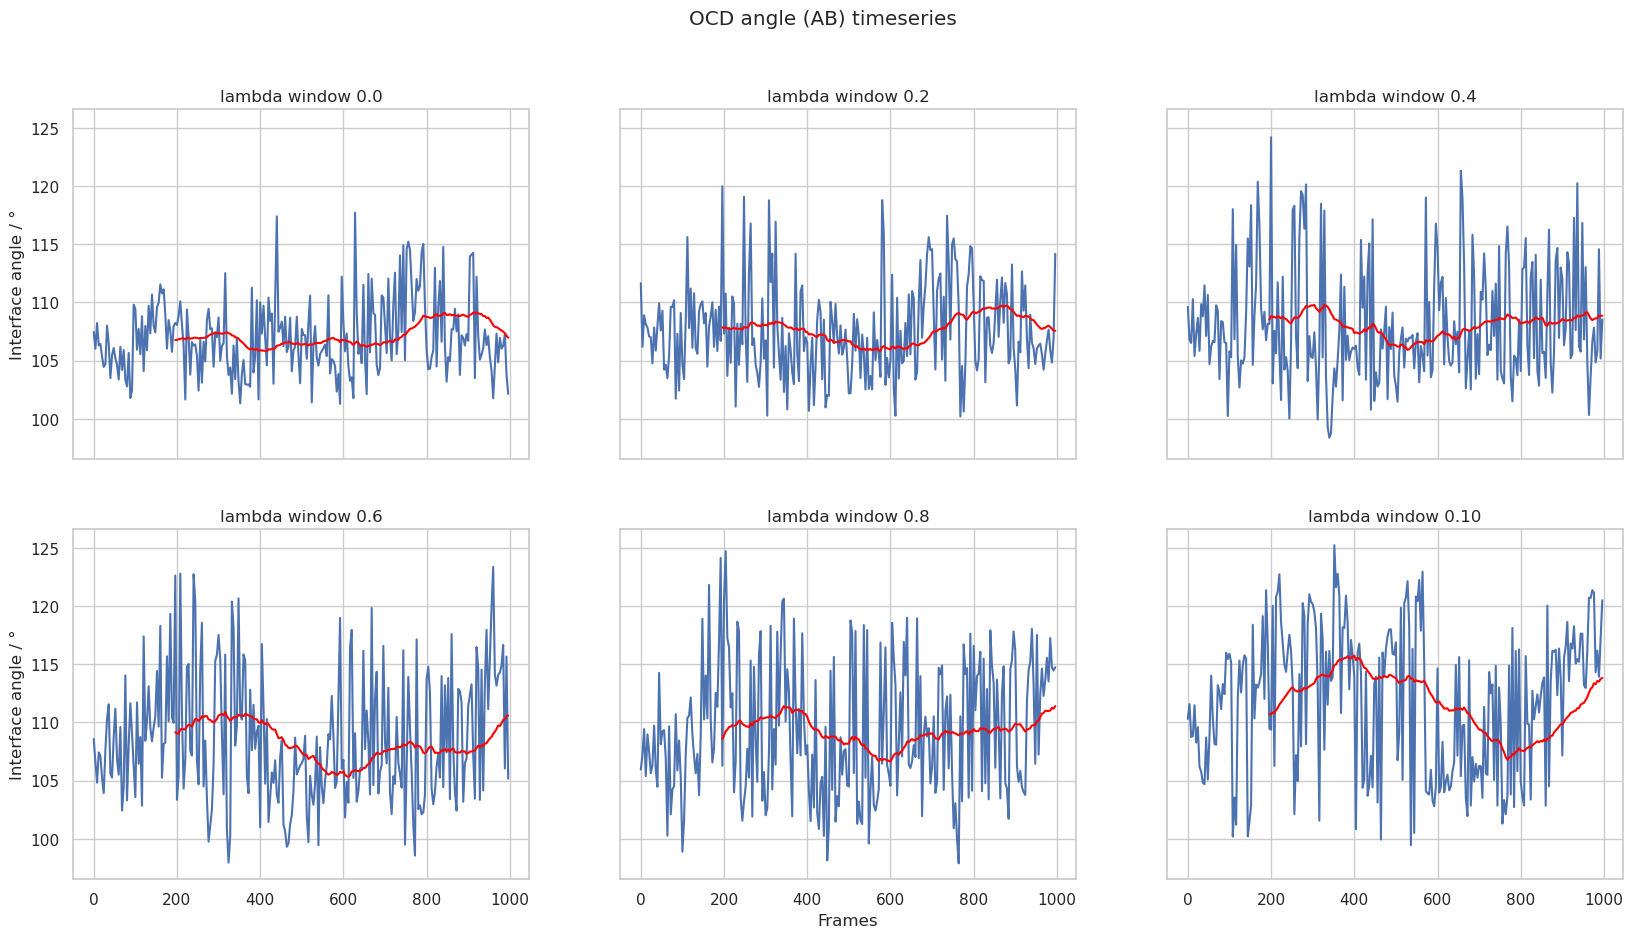

In [113]:
angles_timeseries("/media/storage_5/lpr/5DJ8/prod/OCD_angles/double_mut_AB/rc/OCD_double_mut_AB_rc_00?.dat")

# Good (expected) run2 rc step

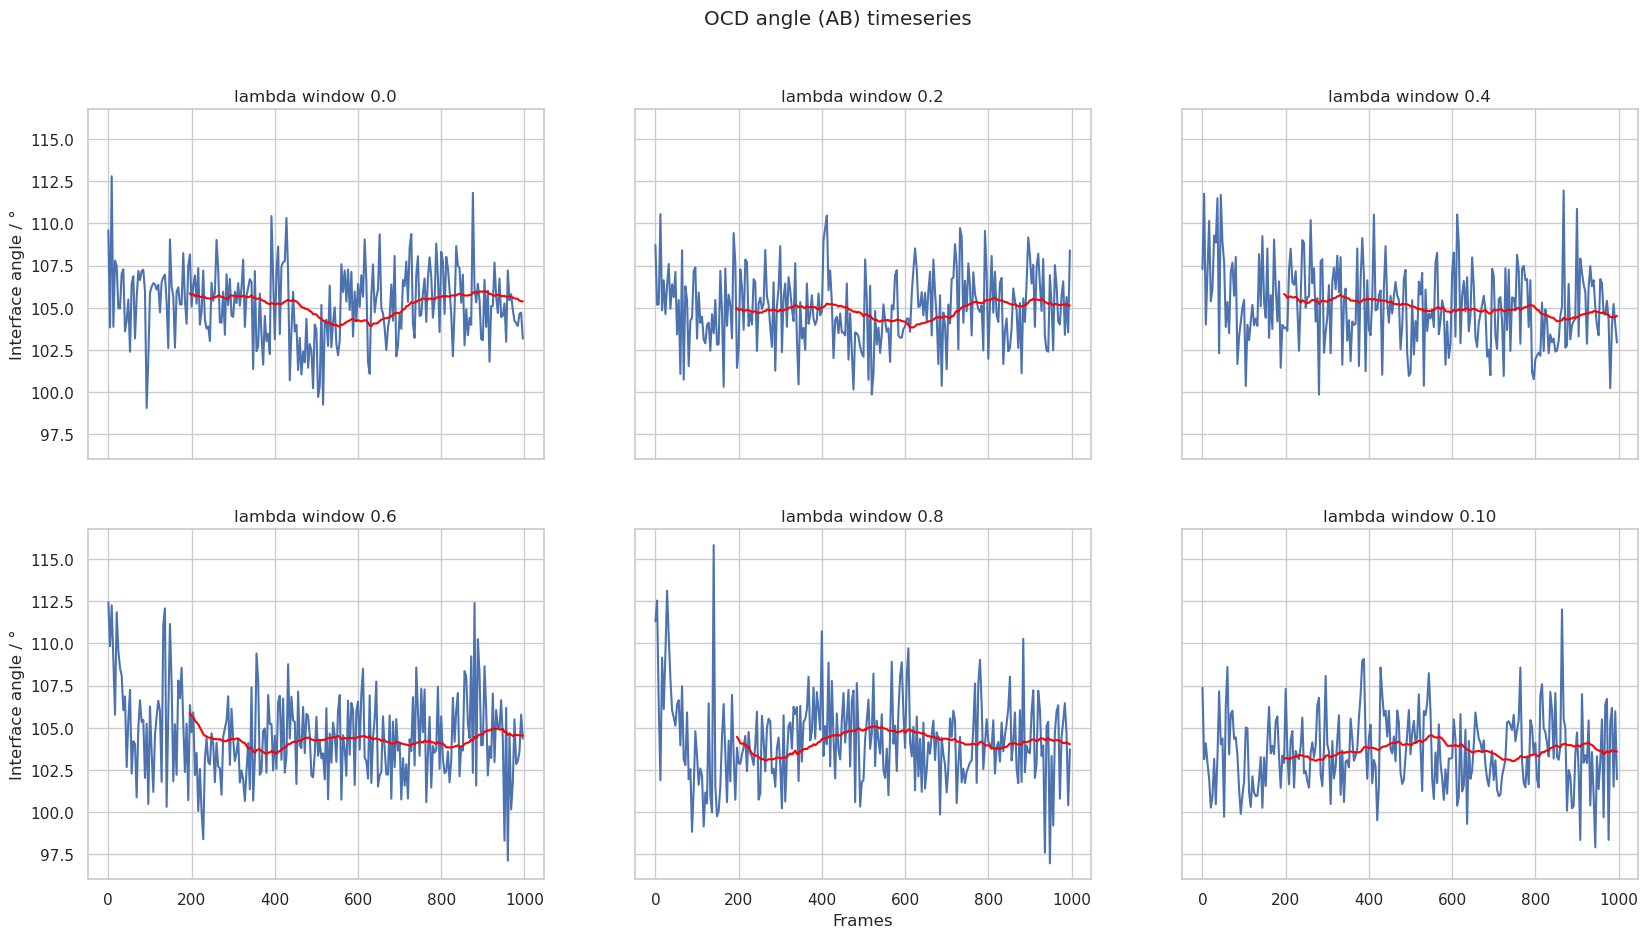

In [114]:
angles_timeseries("/media/storage_6/lpr/5DJ8/run2/prod/OCD_angles/double_mut_AB/rc/OCD_double_mut_AB_rc_00?.dat")